In [1]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt

# Used for data storage and manipulation 
import numpy as np
import pandas as pd

# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For stepwise regression
import statsmodels.api as sm

# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [2]:
# Load your data 
data = pd.read_csv("NFL data.csv")

In [3]:
# adding .head() to your dataset allows you to see the first rows in the dataset. 
# Add a # inside the brackets to specificy how many rows are returned or else 5 rows are returned.
print(data.shape)
# (12144, 18)
data.head()

(12144, 18)


,schedule_date,schedule_season,schedule_week,team_home,team_away,stadium,team_favorite_id,spread_favorite,over_under_line,weather_detail,weather_temperature,weather_wind_mph,weather_humidity,score_home,score_away,stadium_neutral,schedule_playoff,game_id
0,09/02/1966,1966,1,Miami Dolphins,Oakland Raiders,Orange Bowl,NaN,NaN,NaN,NaN,83.0,6.0,71,14,23,False,False,19660902OAKMIA
1,09/03/1966,1966,1,Houston Oilers,Denver Broncos,Rice Stadium,NaN,NaN,NaN,NaN,81.0,7.0,70,45,7,False,False,19660903DENTEN
2,09/04/1966,1966,1,San Diego Chargers,Buffalo Bills,Balboa Stadium,NaN,NaN,NaN,NaN,70.0,7.0,82,27,7,False,False,19660904BUFLAC
3,09/09/1966,1966,2,Miami Dolphins,New York Jets,Orange Bowl,NaN,NaN,NaN,NaN,82.0,11.0,78,14,19,False,False,19660909NYJMIA
4,09/10/1966,1966,1,Green Bay Packers,Baltimore Colts,Lambeau Field,NaN,NaN,NaN,64 degrees- humidity 62%- wind 8 mph,64.0,8.0,62,24,3,False,False,19660910INDGB


In [4]:
# check for the null values in each column
data.isna().sum()

schedule_date             0
schedule_season           0
schedule_week             0
team_home                 0
team_away                 0
stadium                 281
team_favorite_id       2479
spread_favorite        2479
over_under_line        2489
weather_detail         7719
weather_temperature     610
weather_wind_mph        610
weather_humidity       3778
score_home                0
score_away                0
stadium_neutral           0
schedule_playoff          0
game_id                 669
dtype: int64

In [5]:
# Gives you useful info about your data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        12144 non-null  object 
 1   schedule_season      12144 non-null  int64  
 2   schedule_week        12144 non-null  object 
 3   team_home            12144 non-null  object 
 4   team_away            12144 non-null  object 
 5   stadium              11863 non-null  object 
 6   team_favorite_id     9665 non-null   object 
 7   spread_favorite      9665 non-null   float64
 8   over_under_line      9655 non-null   object 
 9   weather_detail       4425 non-null   object 
 10  weather_temperature  11534 non-null  float64
 11  weather_wind_mph     11534 non-null  float64
 12  weather_humidity     8366 non-null   object 
 13  score_home           12144 non-null  int64  
 14  score_away           12144 non-null  int64  
 15  stadium_neutral      12144 non-null 

In [6]:
# Gives you summary statistics on your numeric columns
data.describe()

,schedule_season,spread_favorite,weather_temperature,weather_wind_mph,score_home,score_away
count,12144.000000,9665.000000,11534.000000,11534.000000,12144.000000,12144.000000
mean,1993.376565,-5.373099,58.416334,7.971216,22.307395,19.476861
std,14.754571,3.412725,15.543878,5.597581,10.573272,10.138413
min,1966.000000,-26.500000,-6.000000,0.000000,0.000000,0.000000
25%,1981.000000,-7.000000,48.000000,4.000000,14.000000,13.000000
50%,1994.000000,-4.500000,61.000000,8.000000,21.000000,19.000000
75%,2006.000000,-3.000000,72.000000,12.000000,29.000000,27.000000
max,2017.000000,0.000000,95.000000,40.000000,72.000000,62.000000


In [7]:
# return only rows where the year is greater than 2015
current = data[(data['schedule_season'] > 2015)]

In [8]:
#  no warning message and no exception is raised
pd.options.mode.chained_assignment = None  # default='warn'
# Create a column titled home or away. This column will add a 1 to the row where the New England Patriots played at home 
# and a 0 for away games.
current['home_or_away'] = np.where(current['team_home'] == 'Green Bay Packers', 1, 0)

In [9]:
# Return rows where New England Patriots are either the home or away team
current2 = current.loc[(current["team_home"] == "Green Bay Packers") | (current["team_away"] == "Green Bay Packers")]

# filter to certain columns
final = current2.filter(["team_home","team_away" , "score_home","score_away" ,"weather_temperature", "home_or_away", "over_under_line"])

# merge score_away & score_home into column 'score'
final['score'] = np.where(final['team_away'] == 'Green Bay Packers', final['score_away'], final['score_home'])


# Before showing our final dataset we will drop any rows with NA values.
final = final.dropna()
final.head()

,team_home,team_away,score_home,score_away,weather_temperature,home_or_away,over_under_line,score
11617,Jacksonville Jaguars,Green Bay Packers,23,27,91.0,0,47.5,27
11641,Minnesota Vikings,Green Bay Packers,17,14,72.0,0,43,14
11647,Green Bay Packers,Detroit Lions,34,27,72.0,1,47.5,34
11679,Green Bay Packers,New York Giants,23,16,48.0,1,49,23
11691,Green Bay Packers,Dallas Cowboys,16,30,67.0,1,47,16


In [10]:
final['2_game_avg'] = final.score.rolling(window=2).mean()
final['5_game_avg'] = final.score.rolling(window=5).mean()

final.head()

,team_home,team_away,score_home,score_away,weather_temperature,home_or_away,over_under_line,score,2_game_avg,5_game_avg
11617,Jacksonville Jaguars,Green Bay Packers,23,27,91.0,0,47.5,27,NaN,NaN
11641,Minnesota Vikings,Green Bay Packers,17,14,72.0,0,43,14,20.5,NaN
11647,Green Bay Packers,Detroit Lions,34,27,72.0,1,47.5,34,24.0,NaN
11679,Green Bay Packers,New York Giants,23,16,48.0,1,49,23,28.5,NaN
11691,Green Bay Packers,Dallas Cowboys,16,30,67.0,1,47,16,19.5,22.8


In [11]:
final = final.fillna(final.mean())

C:\Users\bips9\anaconda3\envs\fpenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [12]:
# This time we're checking for Outliers. Check each columns min & max to make sure the # is plausible
final.describe()

,score_home,score_away,weather_temperature,home_or_away,score,2_game_avg,5_game_avg
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,26.342857,22.371429,52.428571,0.485714,24.142857,24.294118,24.935484
std,10.868040,7.738695,21.667658,0.507093,9.536749,7.416315,4.649956
min,0.000000,9.000000,9.000000,0.000000,0.000000,5.500000,13.400000
25%,19.000000,15.000000,36.500000,0.000000,19.000000,20.000000,22.700000
50%,26.000000,24.000000,54.000000,0.000000,26.000000,25.000000,24.935484
75%,34.000000,27.500000,72.000000,1.000000,30.500000,29.000000,26.900000
max,47.000000,35.000000,91.000000,1.000000,38.000000,36.000000,35.000000


In [13]:
#  no warning message and no exception is raised
# pd.options.mode.chained_assignment = None  # default='warn'

In [14]:
df = final[['weather_temperature', 'over_under_line','home_or_away', '2_game_avg','5_game_avg', 'score']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 11617 to 12120
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_temperature  35 non-null     float64
 1   over_under_line      35 non-null     object 
 2   home_or_away         35 non-null     int32  
 3   2_game_avg           35 non-null     float64
 4   5_game_avg           35 non-null     float64
 5   score                35 non-null     int64  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 1.8+ KB


In [16]:
# Need to convert three columns to  float64 Dtype
df['home_or_away'] = df['home_or_away'].astype('float64')
df['over_under_line'] = df['over_under_line'].astype('float64')
df['score'] = df['score'].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 11617 to 12120
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_temperature  35 non-null     float64
 1   over_under_line      35 non-null     float64
 2   home_or_away         35 non-null     float64
 3   2_game_avg           35 non-null     float64
 4   5_game_avg           35 non-null     float64
 5   score                35 non-null     float64
dtypes: float64(6)
memory usage: 1.9 KB


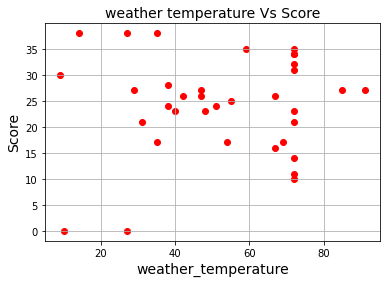

In [17]:
plt.scatter(df['weather_temperature'], df['score'], color='red')
plt.title('weather temperature Vs Score', fontsize=14)
plt.xlabel('weather_temperature', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

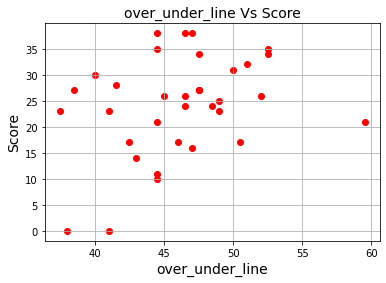

In [18]:
plt.scatter(df['over_under_line'], df['score'], color='red')
plt.title('over_under_line Vs Score', fontsize=14)
plt.xlabel('over_under_line', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

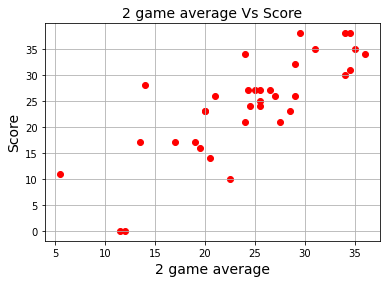

In [19]:
plt.scatter(df['2_game_avg'], df['score'], color='red')
plt.title('2 game average Vs Score', fontsize=14)
plt.xlabel('2 game average', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

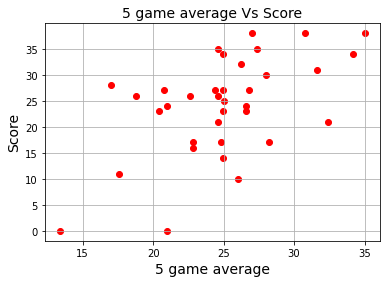

In [20]:
plt.scatter(df['5_game_avg'], df['score'], color='red')
plt.title('5 game average Vs Score', fontsize=14)
plt.xlabel('5 game average', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)

<AxesSubplot:xlabel='home_or_away', ylabel='score'>

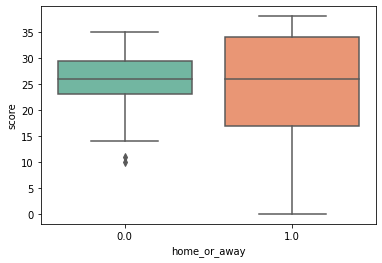

In [21]:
sns.boxplot(x ="home_or_away", y = "score", data = df, palette="Set2")

In [22]:
corr = df.corr()
corr

,weather_temperature,over_under_line,home_or_away,2_game_avg,5_game_avg,score
weather_temperature,1.000000,0.537401,-0.273802,0.030302,0.170809,0.061041
over_under_line,0.537401,1.000000,-0.058586,0.440801,0.595298,0.329322
home_or_away,-0.273802,-0.058586,1.000000,-0.101669,-0.107674,-0.069507
2_game_avg,0.030302,0.440801,-0.101669,1.000000,0.720320,0.795269
5_game_avg,0.170809,0.595298,-0.107674,0.720320,1.000000,0.549691
score,0.061041,0.329322,-0.069507,0.795269,0.549691,1.000000


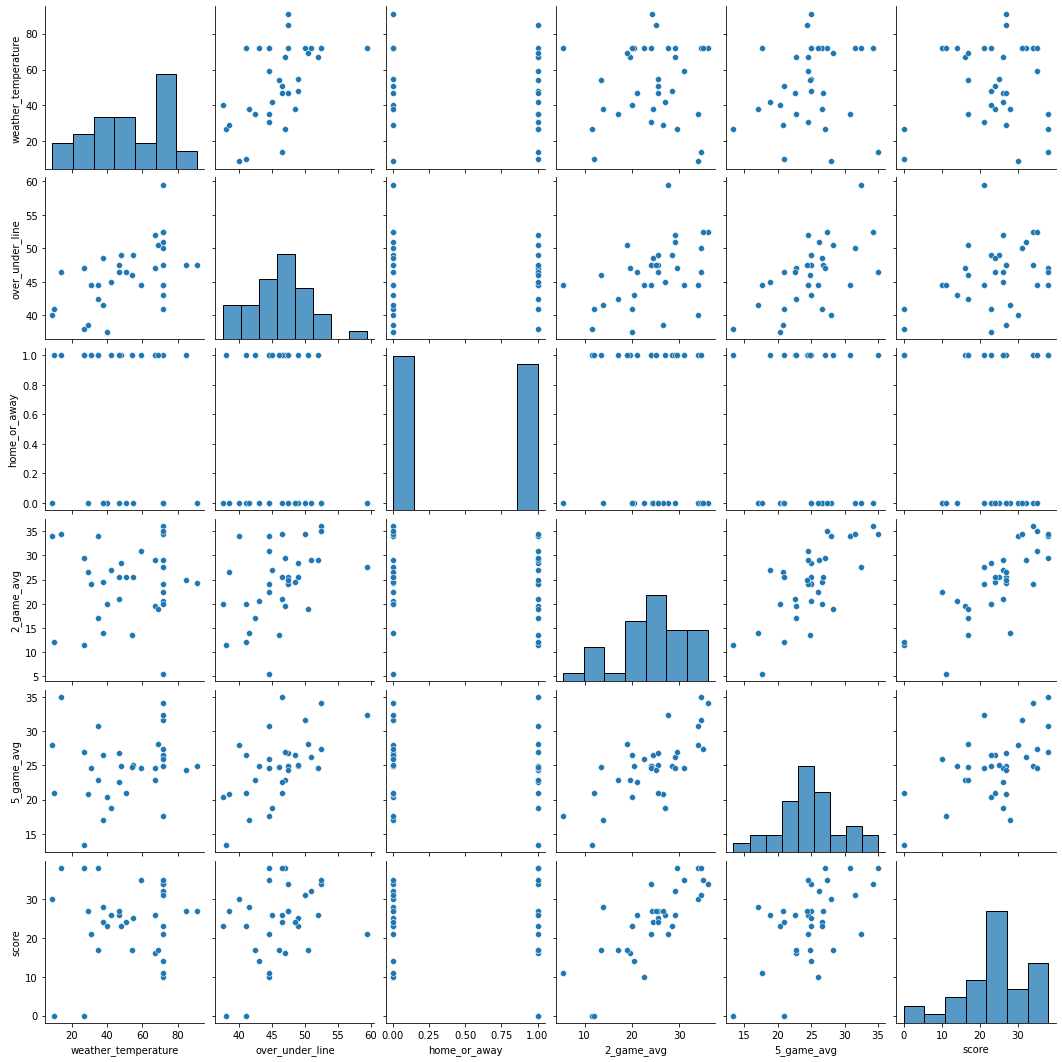

In [23]:
# More optional EDA
pairplot(df)

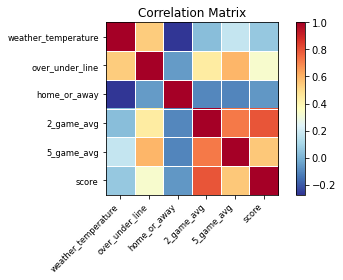

In [24]:
# More optional EDA
fig= plot_corr(corr,xnames=corr.columns)

In [25]:
X = pd.DataFrame(df, columns = ['2_game_avg', 'home_or_away'])
y = pd.DataFrame(df, columns=['score'])

# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

       2_game_avg  home_or_away
12089        25.5           0.0
       2_game_avg  home_or_away
11839        34.0           1.0
       score
12089   24.0
       score
11839   38.0


In [26]:
# Create linear regression model
lin_reg_mod = LinearRegression()

# Fit linear regression
lin_reg_mod.fit(X_train, y_train)

# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [27]:
# Get the slope and intercept of the line best fit.
print(lin_reg_mod.intercept_)


print(lin_reg_mod.coef_)

[1.41370983]
[[0.89451334 3.39181061]]


In [28]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)

# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)
# The closer towards 1, the better the fit
print(test_set_r2)

9.308932695288604
0.46172128359214215


In [29]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['score']) - abs(df_results['Predicted'])
print(df_results)

       score  Predicted  Residuals
11839   38.0  35.218974   2.781026
11884   17.0  21.801274  -4.801274
11679   23.0  30.299151  -7.299151
12050   28.0  13.936897  14.063103
12102    0.0  15.539681 -15.539681
12028    0.0  15.092424 -15.092424
11924   35.0  32.535434   2.464566
12012   23.0  19.303977   3.696023
12008   17.0  20.012247  -3.012247


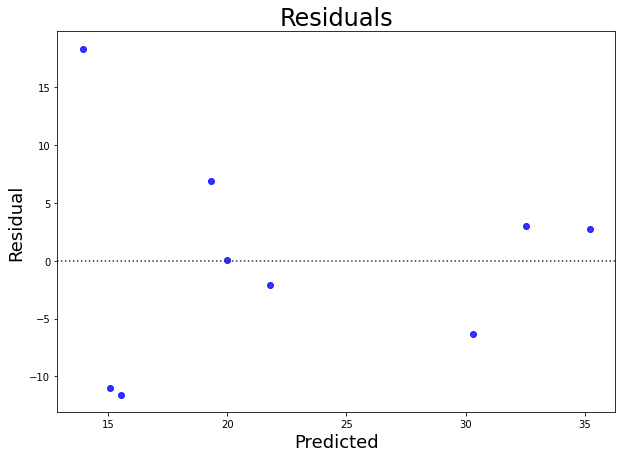

In [33]:
# Residual plot using df_result
fig = plt.figure(figsize=(10,7))
sns.residplot(x = "Predicted", y = "score",data = df_results, color='blue')

# Title and labels.
plt.title('Residuals', size=24)
plt.xlabel('Predicted', size=18)
plt.ylabel('Residual', size=18);

AttributeError: 'float' object has no attribute 'min'

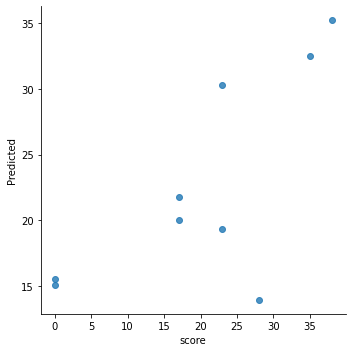

In [34]:
 # Plotting the actual vs predicted values
sns.lmplot(x='score', y='Predicted', data=df_results, fit_reg=False)
line_coords = np.arange(df_results.score.min().min(), df_results.Predicted.max().max())
plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
plt.xlabel('Actual Score', size=10)
plt.title('Actual vs. Predicted')


C:\Users\bips9\anaconda3\envs\fpenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


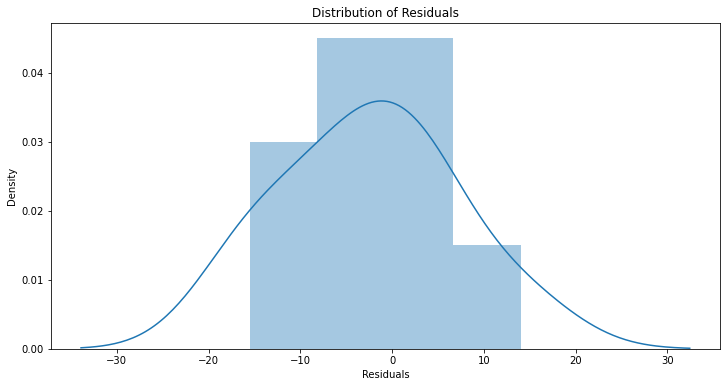

In [40]:
# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [36]:
df2 = df[['2_game_avg', 'home_or_away', 'score']]
corr2 = df2.corr()

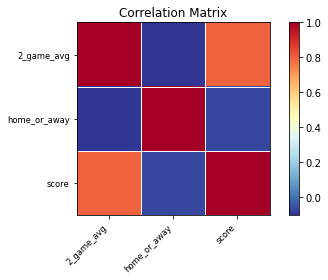

In [37]:
fig= plot_corr(corr2,xnames=corr2.columns)